In [9]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

### Camera calibration pipeline

In [3]:
# get the list of images for calibration
images = glob.glob('camera_cal/calibration*.jpg')

In [34]:
def img2Gray(filename):    
    img = cv2.imread(filename)
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_gray = [img2Gray(x) for x in images]

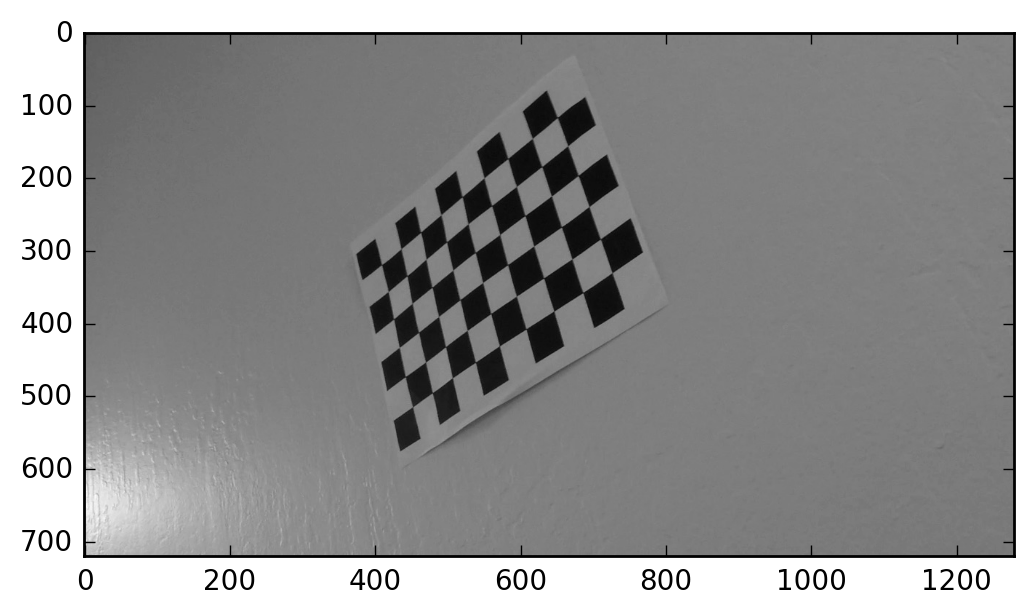

In [38]:
# quick sanity check of images:
plt.imshow(img_gray[4], cmap='gray')

In [39]:
# as can be seen from the image, the chessboard is in a 9 x 6 grid
chessgrid_size = (9,6)
object_points = np.zeros((9*6 ,3), np.float32)
object_points[:,:2] = np.mgrid[0:9, 0:6].T.reshape(-1,2)

In [46]:
# find the corners in the images with cv2 findChessboardCorners function
img_points_arr = []
obj_points_arr = []
def find_corners(img, chessgridsize):
    ret, corners = cv2.findChessboardCorners(img, chessgridsize,None)
    if ret == True:
        img_points_arr.append(corners)
        obj_points_arr.append(object_points)
        
for i in range(len(img_gray)):
    find_corners(img_gray[i], chessgrid_size)

In [54]:
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(obj_points_arr, img_points_arr, img_gray[0].shape[::-1],None,None)
# ret == return, whether cv2 can calibratie successfully, mtx == camera matrix, 
# dist== distortion, rvects/tvects==rotation vector, translation vector

In [57]:
np.save('camera_calibration.npy', {'mtx': mtx, 'dist': dist})

In [69]:
#  now undistort the test images:
test_images_fnames = glob.glob('test_images/test*.jpg')
test_images_gray = [img2Gray(x) for x in test_images_fnames]
undistorted = [cv2.undistort(x, mtx, dist, None, mtx) for x in test_images_gray]

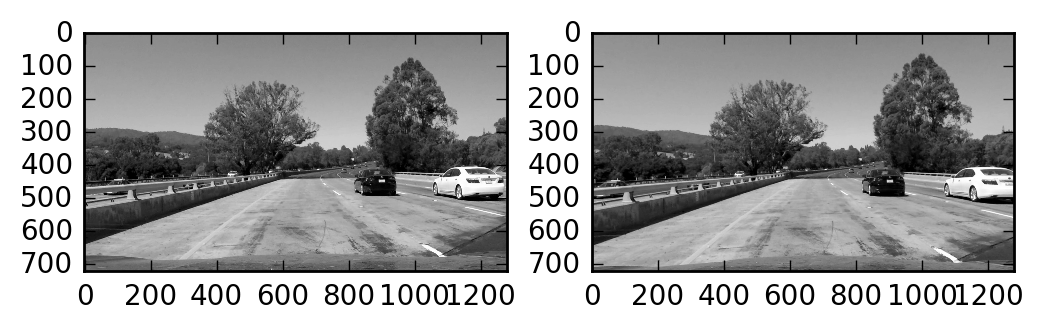

In [67]:
ax = plt.subplot(1,2,1)
ax.imshow(test_images_gray[0], cmap='gray')
ax2 = plt.subplot(1,2,2)
ax2.imshow(undistorted[0], cmap='gray')

In [68]:
undistorted

<function __main__.<listcomp>.<lambda>>